In [46]:
import shutil
import os
import random
import glob

In [123]:
os.chdir('PetImages')
if os.path.isdir('train') is False:
    os.makedirs('test/cat')
    os.makedirs('test/dog')
    
    os.makedirs('valid/cat')
    os.makedirs('valid/dog')
    
    for i in random.sample(glob.glob('Cat/*'),int(len(os.listdir('Cat/'))*.1)):
        shutil.move(i,'test/cat')
    for i in random.sample(glob.glob('Cat/*'),int(len(os.listdir('Cat/'))*.1)):
        shutil.move(i,'valid/cat')
        
    for i in random.sample(glob.glob('Dog/*'),int(len(os.listdir('Dog/'))*.1)):
        shutil.move(i,'test/dog')
    for i in random.sample(glob.glob('Dog/*'),int(len(os.listdir('Dog/'))*.1)):
        shutil.move(i,'valid/dog')
    
    shutil.copytree('Cat','train/cat')
    shutil.copytree('Dog','train/dog')
    
    shutil.rmtree('Cat')
    shutil.rmtree('Dog')

os.chdir('..')

AttributeError: module 'os' has no attribute 'rmtree'

In [139]:
os.listdir('.')

['Cat', 'Dog', 'test', 'valid', 'train']

In [166]:
from tensorflow.keras.preprocessing.image import ImageDataGenerator
train_datagen = ImageDataGenerator(
        rescale=1./255,
        rotation_range=10,
        horizontal_flip=True
)
train_generator = train_datagen.flow_from_directory(
        'train',
        target_size=(256,256),
        batch_size=32,
        class_mode="binary"
#         save_to_dir="C:\\Code\\potato-disease-classification\\training\\AugmentedImages"
)

Found 20154 images belonging to 2 classes.


In [168]:
class_name = list(train_generator.class_indices.keys())
class_name

['cat', 'dog']

In [169]:
validation_datagen = ImageDataGenerator(
        rescale=1./255,
        rotation_range=10,
        horizontal_flip=True)
validation_generator = validation_datagen.flow_from_directory(
        'valid',
        target_size=(256,256),
        batch_size=32,
        class_mode="binary"
)

Found 2238 images belonging to 2 classes.


In [170]:
test_datagen = ImageDataGenerator(rescale=1./255)
test_generator = test_datagen.flow_from_directory(
        'test',
        target_size=(256,256),
        batch_size=32,
        class_mode="binary"
)

Found 2486 images belonging to 2 classes.


In [186]:
import tensorflow as tf
from tensorflow.keras import models, layers
import matplotlib.pyplot as plt
physical_devices = tf.config.experimental.list_physical_devices('GPU')
print(len(physical_devices))

1


In [187]:
model = models.Sequential([
    layers.InputLayer(input_shape=(256,256,3)),
    layers.Conv2D(32, kernel_size = (3,3), activation='relu'),
    layers.MaxPooling2D((2, 2)),
    layers.Conv2D(64,  kernel_size = (3,3), activation='relu'),
    layers.MaxPooling2D((2, 2)),
    layers.Conv2D(64,  kernel_size = (3,3), activation='relu'),
    layers.MaxPooling2D((2, 2)),
    layers.Conv2D(64, (3, 3), activation='relu'),
    layers.MaxPooling2D((2, 2)),
    layers.Conv2D(64, (3, 3), activation='relu'),
    layers.MaxPooling2D((2, 2)),
    layers.Conv2D(64, (3, 3), activation='relu'),
    layers.MaxPooling2D((2, 2)),
    layers.Flatten(),
    layers.Dense(64, activation='relu'),
    layers.Dense(1, activation='sigmoid'),
])

In [188]:
model.summary()

Model: "sequential_2"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
conv2d_12 (Conv2D)           (None, 254, 254, 32)      896       
_________________________________________________________________
max_pooling2d_12 (MaxPooling (None, 127, 127, 32)      0         
_________________________________________________________________
conv2d_13 (Conv2D)           (None, 125, 125, 64)      18496     
_________________________________________________________________
max_pooling2d_13 (MaxPooling (None, 62, 62, 64)        0         
_________________________________________________________________
conv2d_14 (Conv2D)           (None, 60, 60, 64)        36928     
_________________________________________________________________
max_pooling2d_14 (MaxPooling (None, 30, 30, 64)        0         
_________________________________________________________________
conv2d_15 (Conv2D)           (None, 28, 28, 64)       

In [189]:
model.compile(
    optimizer='adam',
    loss=tf.keras.losses.binary_crossentropy,
    metrics=['accuracy']
)

In [183]:
callbacks = tf.keras.callbacks.EarlyStopping(
    monitor="val_loss",
    min_delta=0.00001,
    patience=5,
    verbose=1,
    mode="auto",
    baseline=None,
    restore_best_weights=False,
)

In [184]:
steps_per_epoch = 20154/32
validation_steps = 2238/32

In [190]:
history = model.fit(
    train_generator,
    steps_per_epoch=steps_per_epoch,
    batch_size=32,
    validation_data=validation_generator,
    validation_steps=validation_steps,
    verbose=1,
    epochs=50,
    callbacks=callbacks,
)

Epoch 1/50
629/629 [==============================] - 1385s 2s/step - loss: 0.6595 - accuracy: 0.5832 - val_loss: 0.5255 - val_accuracy: 0.7449
Epoch 2/50
629/629 [==============================] - 1633s 3s/step - loss: 0.5191 - accuracy: 0.7425 - val_loss: 0.4265 - val_accuracy: 0.8123
Epoch 3/50
629/629 [==============================] - 2056s 3s/step - loss: 0.4139 - accuracy: 0.8062 - val_loss: 0.3779 - val_accuracy: 0.8226
Epoch 4/50
629/629 [==============================] - 968s 2s/step - loss: 0.3454 - accuracy: 0.8467 - val_loss: 0.2841 - val_accuracy: 0.8744
Epoch 5/50
629/629 [==============================] - 870s 1s/step - loss: 0.2897 - accuracy: 0.8742 - val_loss: 0.2621 - val_accuracy: 0.8883
Epoch 6/50
629/629 [==============================] - 775s 1s/step - loss: 0.2568 - accuracy: 0.8921 - val_loss: 0.2064 - val_accuracy: 0.9129
Epoch 7/50
629/629 [==============================] - 1565s 2s/step - loss: 0.2220 - accuracy: 0.9050 - val_loss: 0.2088 - val_accuracy: 0.

In [192]:
score = model.evaluate(test_generator)

78/78 [==============================] - 42s 538ms/step - loss: 0.1718 - accuracy: 0.9312


In [193]:
score

[0.1718301624059677, 0.9312148094177246]

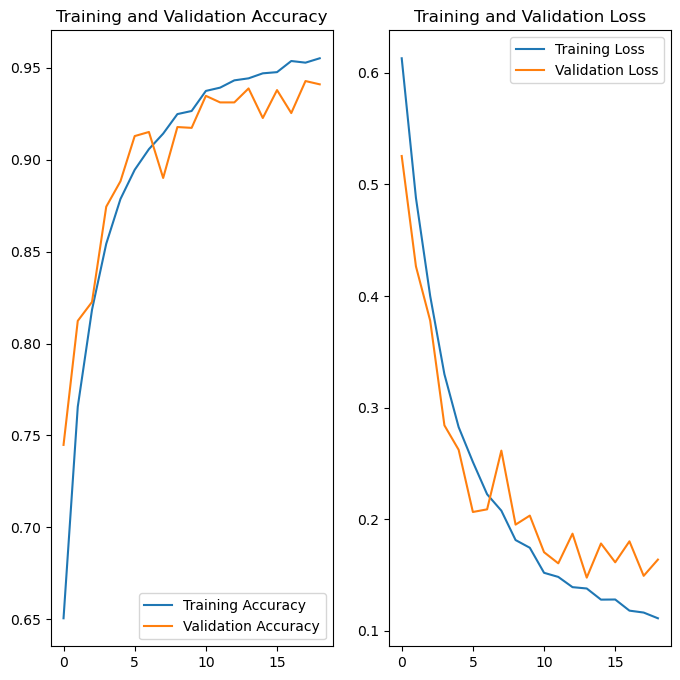

In [196]:
EPOCHS = 19

plt.figure(figsize=(8, 8))
plt.subplot(1, 2, 1)
plt.plot(range(EPOCHS), history.history['accuracy'], label='Training Accuracy')
plt.plot(range(EPOCHS), history.history['val_accuracy'], label='Validation Accuracy')
plt.legend(loc='lower right')
plt.title('Training and Validation Accuracy')

plt.subplot(1, 2, 2)
plt.plot(range(EPOCHS), history.history['loss'], label='Training Loss')
plt.plot(range(EPOCHS), history.history['val_loss'], label='Validation Loss')
plt.legend(loc='upper right')
plt.title('Training and Validation Loss')
plt.show()

In [ ]:
def predict(model, img):
    img_array = tf.keras.preprocessing.image.img_to_array(images[i])
    img_array = tf.expand_dims(img_array, 0)

    predictions = model.predict(img_array)

    predicted_class = class_names[np.argmax(predictions[0])]
    confidence = round(100 * (np.max(predictions[0])), 2)
    return predicted_class, confidence

plt.figure(figsize=(15, 15))
for images, labels in test_generator:
    for i in range(9):
        ax = plt.subplot(3, 3, i + 1)
        plt.imshow(images[i])
        
        predicted_class, confidence = predict(model, images[i])
        actual_class = class_names[int(labels[i])] 
        
        plt.title(f"Actual: {actual_class},\n Predicted: {predicted_class}.\n Confidence: {confidence}%")
        
        plt.axis("off")
    break

In [ ]:
hello